In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
df = pd.read_excel('Productos validados.xlsx')

In [3]:
df.head()

,id_producto,*ano_registro,ano_publicacion,registro_extemporaneo,coordinacion,tipo_producto,subtipo_producto,subtipo2,arbitrado?,titulo,...,indice,factor_impacto,doi,libro,isbn,libro_editorial,cita,*Autor de correspondencia,Autores | *Autor de correspondencia | ªEstudiante,documentos
0,100100017,2024,2024,NaN,Desarrollo Regional,Libro,"editorial reconocida, hasta 3 autores",NaN,1.0,Innovación Social y su retorno en la inversión...,...,NaN,NaN,NaN,NaN,978-607-7900-55-9,NaN,*Mejía Trejo J.; *Borbón Morales C.G.; *Aguila...,*Mejía Trejo J.(* Pendiente); *Borbón Morales ...,*Mejía Trejo J.; *Borbón Morales C.G.; *Aguila...,http://200.23.35.7/archivos/productos/mepippa/...
1,100200014,2025,2024,NaN,Desarrollo Regional,Editor de libro,"institución o asociación académica, pública o ...",NaN,1.0,La Prevención de las violencias de Género. Apr...,...,NaN,NaN,NaN,La prevención de las violencias de género,978-607-7900-64-1,Centro de Investigación en Alimentación y Desa...,*Salazar Antúnez G.; *Hernández González G. (E...,*Salazar Antúnez G.(Desarrollo Regional); *Her...,*Salazar Antúnez G.; *Hernández González G.,http://reportes.ciad.mx/archivos/productos/mep...
2,100300163,2023,2023,NaN,TAOA,Capítulo de libro,editorial reconocida,NaN,1.0,Artisanal cheese chemistry,...,NaN,NaN,NaN,Handbook of cheese chemistry,978-1-83916-309-8,ROYAL SOC CHEMISTRY,*Vallejo Galland B.; Reyes Díaz R.; Beltrán Ba...,*Vallejo Galland B.(TAOA),*Vallejo Galland B.; Reyes Díaz R.; Beltrán Ba...,http://200.23.35.7/archivos/productos/mepippa/...
3,100300184,2024,2024,NaN,Culiacán,Capítulo de libro,editorial reconocida,NaN,1.0,Microorganisms as biofactories of powerful age...,...,NaN,NaN,NaN,Developments in Applied Microbiology and Biote...,978-0-443-19049-0,ELSEVIER,Jimenez Ortega L.; Orozco Ochoa A.; Valdez Bar...,*Heredia . J.B.(Culiacán),ªJimenez Ortega L.; ªOrozco Ochoa A.; ªValdez ...,http://200.23.35.7/archivos/productos/mepippa/...
4,100300185,2024,2024,NaN,TAOV,Capítulo de libro,editorial reconocida,NaN,1.0,Pectin from byproducts in the food industry: t...,...,NaN,NaN,NaN,Food Byproducts Management and Their Utilization,978-1-0033-7780-1,CRC PRESS-TAYLOR & FRANCIS GROUP,*Quintana Obregón E.A.; Martínez Téllez M.A.; ...,*Quintana Obregón E.A.(TAOV),*Quintana Obregón E.A.; Martínez Téllez M.A.; ...,http://200.23.35.7/archivos/productos/mepippa/...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   id_producto                                        1496 non-null   int64  
 1   *ano_registro                                      1496 non-null   int64  
 2   ano_publicacion                                    1496 non-null   int64  
 3   registro_extemporaneo                              59 non-null     object 
 4   coordinacion                                       1496 non-null   object 
 5   tipo_producto                                      1496 non-null   object 
 6   subtipo_producto                                   1496 non-null   object 
 7   subtipo2                                           415 non-null    object 
 8   arbitrado?                                         105 non-null    float64
 9   titulo  

In [5]:
df.tipo_producto.unique()

array(['Libro', 'Editor de libro', 'Capítulo de libro',
       'Subcapítulo o artículo de libro',
       'Árbitro o dictaminador de libro',
       'Árbitro o dictaminador de capítulo de libro',
       'Coordinador de libro', 'Artículo científico', 'Editor de revista',
       'Miembro de comité editorial',
       'Editor asignado por número especial',
       'Editor asignado por artículo', 'Árbitro de artículos de revista',
       'Publicaciones derivadas de eventos colectivos',
       'Conferencias/Congresos/Reuniones Cientificas',
       'Organización de eventos académicos, de extensión y difusión',
       'Otras participaciones en eventos', 'Evaluador de proyectos',
       'Premios', 'Informe interno anual de actividades',
       'Sistema Nacional de Investigadores',
       'Sistema Sinaloense de Investigadores y Tecnólogos',
       'Academia Mexicana de Ciencias'], dtype=object)

In [6]:
df["registro_extemporaneo"] = df["registro_extemporaneo"].apply(lambda x: x == 'SI')


In [7]:
def graficar(df, columna:str) :
    sns.barplot(x="size", y=columna, data=df)

    # Agregar título y etiquetas
    plt.xlabel("Cantidad")
    plt.ylabel(columna)
    plt.title("Cantidad de elementos por "+ columna +" (Ordenado Descendentemente)")

    # Mostrar el gráfico
    plt.show()

In [8]:
def agrupar(df, columna:str):
    return graficar(df.groupby(columna, as_index=False).size().sort_values(by="size", ascending=False), columna)

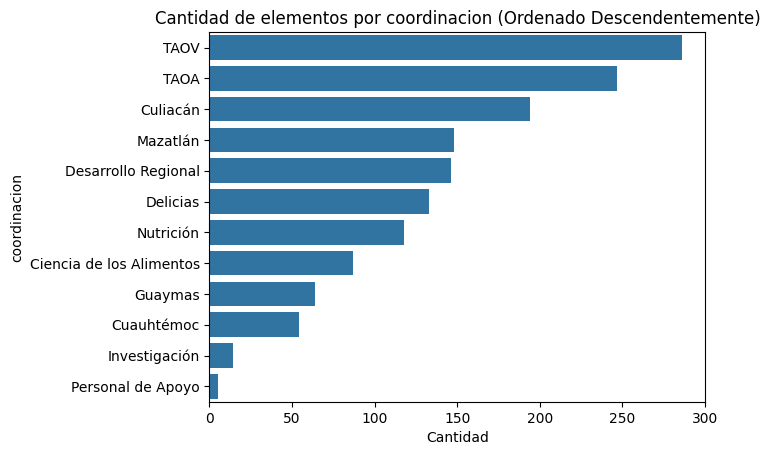

In [9]:
agrupar(df,'coordinacion')

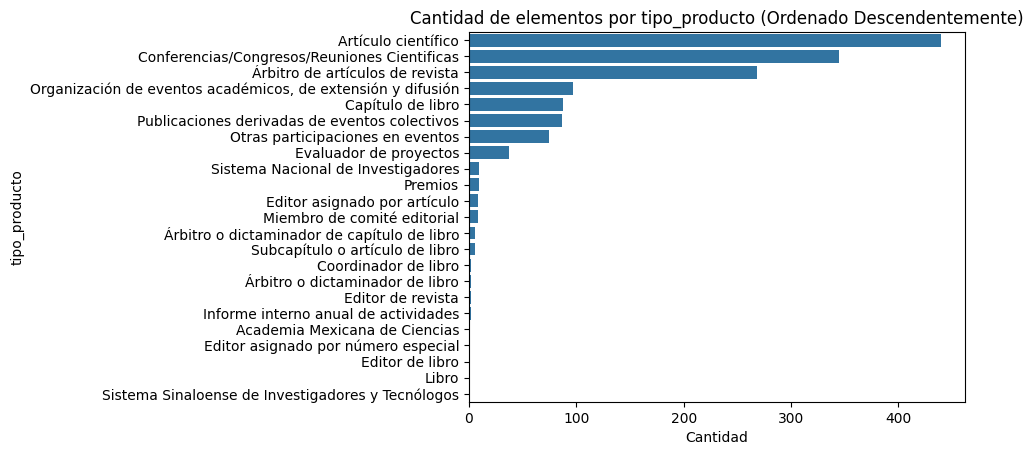

In [10]:
agrupar(df,'tipo_producto')

In [11]:
df['*Autor de correspondencia'] = df['*Autor de correspondencia'].astype(str).str.strip()

# 2️⃣ Separar autores en filas individuales
df_exploded = df.assign(
    Autores=df['*Autor de correspondencia'].str.split(";")
).explode("Autores")

# 3️⃣ Limpiar nombres de autores eliminando espacios y asteriscos
df_exploded["Autores"] = df_exploded["Autores"].str.strip().str.lstrip("*")

# 4️⃣ Obtener autores únicos
Autores_correspondencia = df_exploded["Autores"].dropna().unique()

In [12]:
Autores_correspondencia

array(['Mejía Trejo J.(* Pendiente)',
       'Borbón Morales C.G.(Desarrollo Regional)',
       'Aguilar Navarro C.(Centro de Investigación y Asistencia en Tecnología y Diseño del Estado de Jalisco (CIATEJ))',
       'Salazar Antúnez G.(Desarrollo Regional)',
       'Hernández González G.(Universidad Autonoma de Querétaro)',
       'Vallejo Galland B.(TAOA)', 'Heredia . J.B.(Culiacán)',
       'Quintana Obregón E.A.(TAOV)', 'Baeza Jimenez R.(Delicias)',
       'Camarena Gómez B.O.(Desarrollo Regional)',
       'Vargas Ortiz M.A.(TAOA)', 'Hernández Mendoza A.(TAOA)',
       'López Franco Y.L.(TAOA)', 'Duarte-Sierra A.(* Pendiente)',
       'Almazán Rueda P.(Mazatlán)',
       'García Salazar E.M.(Ciencia de los Alimentos)',
       'Rosas Baños M.(Instituto Politécnico Nacional)',
       'Islas Osuna M.A.(TAOV)', 'Virgen Ortiz J.J.(TAOV)',
       'Osuna Castro J.A.(Universidad de Colima)',
       'Hernández González C.(Mazatlán)',
       'Aguilar C.N.(Universidad Autónoma de Coahuila)',


In [13]:
patron = r"(.+?)\s*\(([^)]*)\)"  # Captura "Nombre (Institución)"

datos = []
elementos_no_procesados = []

for elemento in Autores_correspondencia:
    match = re.match(patron, elemento)
    if match:
        nombre, institucion = match.groups()
        datos.append((nombre.strip(), institucion.strip()))
    else:
        elementos_no_procesados.append(elemento)  # Si no tiene institución

# 6️⃣ Crear DataFrame con autores procesados
Autores = pd.DataFrame(datos, columns=["Nombre", "Institución"])

In [14]:
import numpy as np
import re
from unidecode import unidecode

# Función para limpiar texto (convertir a minúsculas, eliminar caracteres especiales y acentos)
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()  
    
    # Eliminar caracteres especiales y convertir acentos a letras normales
    texto = unidecode(texto)  # Elimina los acentos
    
    # Eliminar cualquier otro carácter no alfanumérico
    texto = re.sub(r'[^a-z\.0-9\s]', '', texto)  # Solo dejar letras, números y espacios
    
    return texto

# Inicializar la columna en 0
Autores['No. Documentos AC'] = np.zeros(Autores.shape[0])

for i in range(Autores.shape[0]):
    # Obtener el nombre del autor y limpiarlo
    nombre = limpiar_texto(Autores.loc[i, 'Nombre']) 
    
    for j in range(df.shape[0]):
        # Limpiar el texto de la columna '*Autor de correspondencia'
        busqueda = limpiar_texto(df.loc[j, '*Autor de correspondencia'])
        
        # Verificar si el nombre está contenido en el texto (buscando coincidencias)
        if busqueda.find(nombre) != -1:
            Autores.loc[i, 'No. Documentos AC'] += 1


In [15]:
df[['*Autor de correspondencia']].iloc[0,0]

'*Mejía Trejo J.(* Pendiente); *Borbón Morales C.G.(Desarrollo Regional); *Aguilar Navarro C.(Centro de Investigación y Asistencia en Tecnología y Diseño del Estado de Jalisco (CIATEJ))'

In [16]:
Autores

,Nombre,Institución,No. Documentos AC
0,Mejía Trejo J.,* Pendiente,1.0
1,Borbón Morales C.G.,Desarrollo Regional,10.0
2,Aguilar Navarro C.,Centro de Investigación y Asistencia en Tecnol...,1.0
3,Salazar Antúnez G.,Desarrollo Regional,3.0
4,Hernández González G.,Universidad Autonoma de Querétaro,1.0
...,...,...,...
511,Olmeda Rubio C.,Culiacán,1.0
512,Noriega Orozco L.O.,Guaymas,1.0
513,Vélez de la Rocha R.,Culiacán,1.0
514,Guerrero Ruiz C.A.,Mazatlán,2.0


In [17]:
df.tipo_producto.unique().tolist()

['Libro',
 'Editor de libro',
 'Capítulo de libro',
 'Subcapítulo o artículo de libro',
 'Árbitro o dictaminador de libro',
 'Árbitro o dictaminador de capítulo de libro',
 'Coordinador de libro',
 'Artículo científico',
 'Editor de revista',
 'Miembro de comité editorial',
 'Editor asignado por número especial',
 'Editor asignado por artículo',
 'Árbitro de artículos de revista',
 'Publicaciones derivadas de eventos colectivos',
 'Conferencias/Congresos/Reuniones Cientificas',
 'Organización de eventos académicos, de extensión y difusión',
 'Otras participaciones en eventos',
 'Evaluador de proyectos',
 'Premios',
 'Informe interno anual de actividades',
 'Sistema Nacional de Investigadores',
 'Sistema Sinaloense de Investigadores y Tecnólogos',
 'Academia Mexicana de Ciencias']

In [18]:
Autores['No. Documentos No AC'] = np.zeros(Autores.shape[0])
Autores['No. Documentos No AC'] = np.zeros(Autores.shape[0])


for tipo in df.tipo_producto.unique().tolist():
    Autores['No. ' + tipo] = np.zeros(Autores.shape[0])


for i in range(Autores.shape[0]):
    # Obtener el nombre del autor y limpiarlo
    nombre = limpiar_texto(Autores.loc[i, 'Nombre']) 
    
    for j in range(df.shape[0]):
        # Limpiar el texto de la columna '*Autor de correspondencia'
        busqueda = limpiar_texto(df.loc[j, 'Autores | *Autor de correspondencia | ªEstudiante'])
        
        # Verificar si el nombre está contenido en el texto (buscando coincidencias)
        if busqueda.find(nombre) != -1:
            Autores.loc[i, 'No. Documentos No AC'] += 1
            tipo_producto = df.loc[j, 'tipo_producto']
            Autores.loc[i, 'No. ' + tipo_producto] += 1 
            Autores

In [19]:
for tipo in df.tipo_producto.unique().tolist():
    Autores['No. ' + tipo] = Autores['No. ' + tipo].astype('int')

In [20]:
import pandas as pd
from collections import Counter

# Función para limpiar nombres (quitar * y ª)
def limpiar_nombre(nombre):
    return nombre.strip().lstrip("*").lstrip("ª").strip()

# Crear una columna vacía en Autores
Autores["Colaboradores"] = [{} for _ in range(len(Autores))]

# Iterar sobre cada fila del DataFrame df
for i in range(df.shape[0]):
    # Obtener la lista de nombres y limpiarlos
    nombres = [limpiar_nombre(n) for n in df.loc[i, "Autores | *Autor de correspondencia | ªEstudiante"].split(";") if n.strip()]
    
    # Actualizar el conteo de colaboraciones para cada autor en Autores
    for nombre in nombres:
        if nombre in Autores["Nombre"].values:  # Verificar si el autor está en Autores
            index = Autores.index[Autores["Nombre"] == nombre][0]  # Obtener su índice en Autores
            
            # Obtener o inicializar el diccionario de colaboradores
            colaboradores_dict = Autores.at[index, "Colaboradores"]
            
            # Contar cuántas veces aparece cada colaborador (sin contar al mismo autor)
            for colaborador in nombres:
                if colaborador != nombre:
                    colaboradores_dict[colaborador] = colaboradores_dict.get(colaborador, 0) + 1
            
            # Guardar el diccionario actualizado
            Autores.at[index, "Colaboradores"] = colaboradores_dict


In [21]:
Autores['No. Documentos AC'] = Autores['No. Documentos AC'].astype('int')
Autores['No. Documentos No AC'] = Autores['No. Documentos No AC'].astype('int')
Autores.to_csv('Autores.csv',index=False)

In [22]:
sorted(Autores.Institución.unique().tolist())

['* Anónima',
 '* Pendiente',
 'Bihar Agricultural University',
 'Centro Interdisciplinario de Investigación para el Desarrollo Integral Regional',
 'Centro de Investigaciones Biológicas del Noroeste (CIBNOR',
 'Centro de Investigación Científica y de Educación Superior de Ensenada (CICESE',
 'Centro de Investigación en Alimentación y Desarrollo A.C.',
 'Centro de Investigación en Alimentación y Desarrollo. Programa Posgrado',
 'Centro de Investigación en Recursos Naturales',
 'Centro de Investigación y Asistencia en Tecnología y Diseño del Estado de Jalisco (CIATEJ',
 'Centro de Investigación y de Estudios Avanzados -Mérida',
 'Ciencia de los Alimentos',
 'Colegio de la Frontera Norte',
 'Colegio de postgraduados',
 'Consejo Nacional de Ciencia y Tecnología',
 'Cuauhtémoc',
 'Culiacán',
 'DC',
 'DC-EXT',
 'DDR',
 'Delicias',
 'Desarrollo Regional',
 'Dirección General',
 'ESP',
 'EXT',
 'Eastern Regional Research Center',
 'Facultad de Ciencias del Mar',
 'Federal University of Rio de

In [23]:
Autores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Nombre                                                           516 non-null    object
 1   Institución                                                      516 non-null    object
 2   No. Documentos AC                                                516 non-null    int64 
 3   No. Documentos No AC                                             516 non-null    int64 
 4   No. Libro                                                        516 non-null    int64 
 5   No. Editor de libro                                              516 non-null    int64 
 6   No. Capítulo de libro                                            516 non-null    int64 
 7   No. Subcapítulo o artículo de libro                  

In [24]:
Autores

,Nombre,Institución,No. Documentos AC,No. Documentos No AC,No. Libro,No. Editor de libro,No. Capítulo de libro,No. Subcapítulo o artículo de libro,No. Árbitro o dictaminador de libro,No. Árbitro o dictaminador de capítulo de libro,...,No. Conferencias/Congresos/Reuniones Cientificas,"No. Organización de eventos académicos, de extensión y difusión",No. Otras participaciones en eventos,No. Evaluador de proyectos,No. Premios,No. Informe interno anual de actividades,No. Sistema Nacional de Investigadores,No. Sistema Sinaloense de Investigadores y Tecnólogos,No. Academia Mexicana de Ciencias,Colaboradores
0,Mejía Trejo J.,* Pendiente,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"{'Borbón Morales C.G.': 2, 'Aguilar Navarro C...."
1,Borbón Morales C.G.,Desarrollo Regional,10,12,1,0,3,0,0,0,...,4,0,1,0,0,0,0,0,0,"{'Mejía Trejo J.': 2, 'Aguilar Navarro C.': 1,..."
2,Aguilar Navarro C.,Centro de Investigación y Asistencia en Tecnol...,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"{'Mejía Trejo J.': 1, 'Borbón Morales C.G.': 1}"
3,Salazar Antúnez G.,Desarrollo Regional,3,3,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,{'Hernández González G.': 1}
4,Hernández González G.,Universidad Autonoma de Querétaro,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,{'Salazar Antúnez G.': 1}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,Olmeda Rubio C.,Culiacán,1,4,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,"{'Leyva Morales J.': 1, 'Calderon Araya R.': 1..."
512,Noriega Orozco L.O.,Guaymas,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,{}
513,Vélez de la Rocha R.,Culiacán,1,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,"{'López Virgen A.': 1, 'Dautt Castro M.': 1, ..."
514,Guerrero Ruiz C.A.,Mazatlán,2,7,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,"{'Lizárraga Lizárraga E.': 1, 'García Gasca S...."


In [25]:
Autores.groupby(by='Institución', as_index=False).size().sort_values(by='size',ascending= False)

,Institución,size
1,* Pendiente,82
50,TAOV,37
49,TAOA,33
17,DC,29
44,Mazatlán,27
...,...,...
82,Universidad de Santiago de Compostela,1
84,Universidad del Papaloapan,1
85,Universidade Federal do Ceará,1
86,University of Aberdeen,1
